In [1]:
import pandas as pd

df = pd.read_csv('bike+sharing+dataset/hour.csv')
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
df = df.drop(['dteday','instant'], axis=1)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

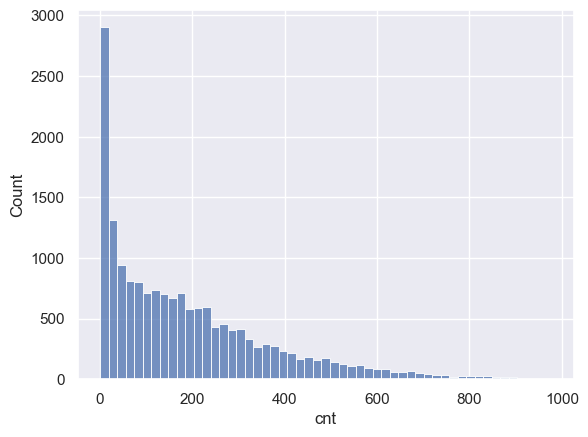

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['cnt'])

In [5]:
x = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df['cnt']

In [6]:
corr_matrix = df.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'max_depth': [9, 8],           
    'learning_rate': [ 0.095, 0.093, 0.094],  
    'n_estimators': [150, 155, 145],    
    'subsample': [0.62,0.625, 0.615],            
    'colsample_bytree': [1.0]     
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=1
)
# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.62; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.625; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.625; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=9, n_estimators=150, subsample=0.625; total time

[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=155, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=145, subsample=0.62; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095, max_depth=8, n_estimators=145, subsample=0.62; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.095

[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.62; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.625; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.093, max_depth=8, n_estimators=150, subsample=0.615; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.09

[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=155, subsample=0.615; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.62; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.625; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, max_depth=9, n_estimators=145, subsample=0.625; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.094, m

In [16]:
final_model = grid_search.best_estimator_
print(final_model.get_params())
y_pred = final_model.predict(X_test_scaled)

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.093, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 9, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 150, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.62, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 22.773959660829743
Mean Squared Error: 1458.8426973219168
R-squared: 0.9539294569136914


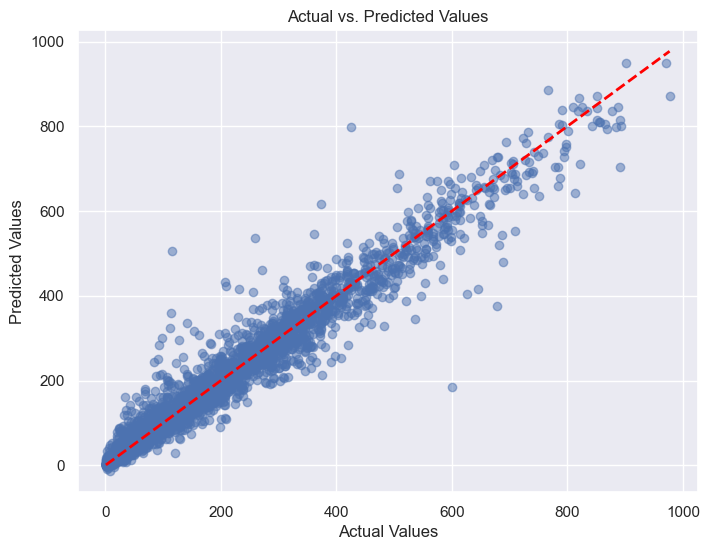

In [18]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()